# 4.4. Regresja liniowa w 2D

Regresja liniowa to najbardziej podstawowa metoda uczenia maszynowego jaką omówimy. Idea stojąca za tym algorytmem jest dosyć prosta, a sam algorytm jest istotny nie ze względu na wybitną skuteczność, ale stoi on u podstaw bardziej zaawansowanych metod.

Dla prostoty przejdziemy proces nauczania krok po kroku i przeprowadzimy go tylko w dwóch wymiarach.

In [1]:
import pandas as pd

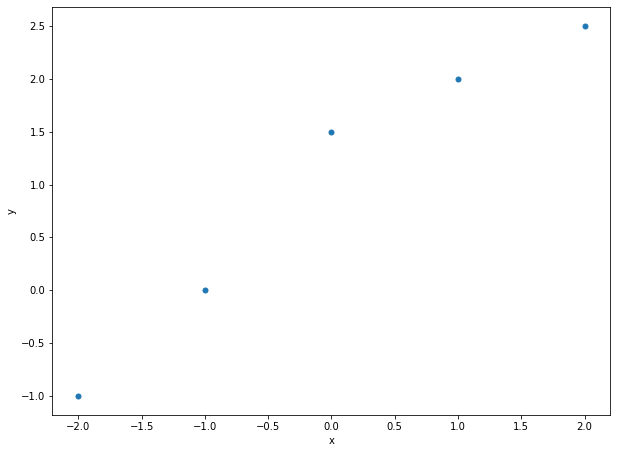

In [2]:
xy_df = pd.DataFrame({
    "x": [1, -2, 2, -1, 0],
    "y": [2, -1, 2.5, 0, 1.5],
})
xy_df.plot.scatter(x="x", y="y", s=25,
                   figsize=(10.0, 7.5))

Gdybyśmy chcieli poprowadzić linię, która przybliża powyższe dane, to istnieje nieskończenie wiele możliwości. Nie da się jednak, w naszym przypadku, poprowadzić jednej prostej przechodzącej przez wszystkie punkty.

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
def draw_line(a, b, x_min=-5, x_max=5):
    x = np.linspace(x_min, x_max, 1000)
    y = a * x + b
    plt.plot(x, y, "-r", c=(.75, .1, .1, .25))

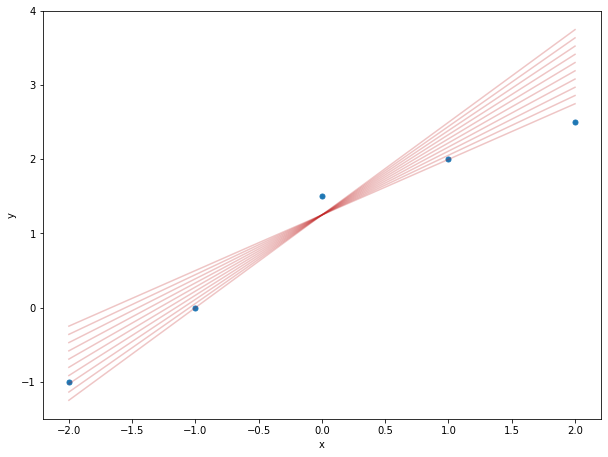

In [5]:
xy_df.plot.scatter(x="x", y="y", s=25,
                   figsize=(10.0, 7.5))
for x in np.linspace(0.75, 1.25, 10):
    draw_line(x, 1.25, -2, 2)

## Algorytm regresji liniowej

Regresja liniowa to model, który stara się przybliżyć daną wartość numeryczną za pomocą sumy ważonej cech. Zakłada się tutaj, że istnieje liniowa relacja pomiędzy cechami, a zmienną którą przewidujemy.

$$ y = \beta_{0} + \beta_{1} \cdot x_{1} + \beta_{2} \cdot x_{2} ... $$

Gdzie:

$ x $ jest wektorem cech

$ \beta $ wektorem odpowiadających im wag

$ y $ przewidywaną wartością

W dwóch wymiarach ograniczamy się tylko do jednej *zmiennej niezależnej*, a więc powyższy wzór przyjmie wartość:

$$ y = \beta_{0} + \beta_{1} \cdot x $$

Lub inaczej:

$$ y = a \cdot x + b $$

Naszym celem jest znalezienie takich wag $ \beta $, aby średni błąd przewidywania wartości $ y $ dla wszystkich wektorów $ x $ był jak najmniejszy. Zazwyczaj stosujemy odległość Euklidesową dla pomiaru błędu.

### Liczenie błędu predykcji dla zadanej prostej

Chcielibyśmy przewidzieć wartość $ y $, mając daną wartość $ x $. Zakładamy istnienie relacji pomiędzy tymi dwiema zmiennymi, a w przypadku regresji liniowej zakładamy że ta relacja jest liniowa. Będziemy to robić na podstawie danych nam punktów $ (x, \overline{y}) $. Nasza prosta będzie miała równanie $ y = a \cdot x + b $. Jeśli więc, mamy już wybraną prostą, to błąd predykcji dla pojedynczego wektora obliczymy za pomocą:

$$ \varepsilon^{2} = (\overline{y} - y)^{2} = (\overline{y} - (a x + b))^{2} $$

Oczywiście nie chcemy dopasować prostej do jednego punktu. Dlatego też, sumujemy błąd prostej o parametrach $ a $ i $ b $ dla wszystkich punktów ze zbioru. Sumę tą nazywa się często SSR (ang. *sum of squared residuals*):

$$ RSS = \sum _{i=1}^{n}\varepsilon _{i}^{2} = \sum _{i=1}^{n}(\overline{y_{i}}-( a x_{i} + b))^{2} $$

Aby znaleźć optimum funkcji, należy policzyć pochodne ze względu na współczynnik kierunkowy prostej ($ a $) oraz wyraz wolny ($ b $).

## Przewidywanie jakości wina

Przejdźmy do problemu, który chcemy zamodelować. Na początek wczytajmy sobie rozpatrywany zbiór danych.

In [6]:
wine_quality_df = pd.read_parquet("./data/wine-quality.parquet")
wine_quality_df.sample(n=5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color_red,color_white,bound sulfur dioxide
699,11.8,0.38,0.55,2.1,0.071,5.0,19.0,0.9986,3.11,0.62,10.8,6,1,0,14.0
2296,6.9,0.28,0.31,7.2,0.040,47.0,168.0,0.9946,3.29,0.57,10.6,7,0,1,121.0
1800,7.6,0.30,0.22,10.2,0.049,57.0,191.0,0.9966,3.08,0.40,9.3,6,0,1,134.0
606,7.3,0.25,0.29,7.5,0.049,38.0,158.0,0.9965,3.43,0.38,9.6,5,0,1,120.0
2818,6.0,0.11,0.47,10.6,0.052,69.0,148.0,0.9958,2.91,0.34,9.3,4,0,1,79.0


## Trenowanie modelu

Jeśli pamiętasz, zawartość alkoholu miała największą absolutną wartość korelacji z oceną jakości. W związku z tym, wydaje się być ona najlepszym predyktorem do przewidywania. Na początek wyświetlmy sobie obie wartości w 2D.

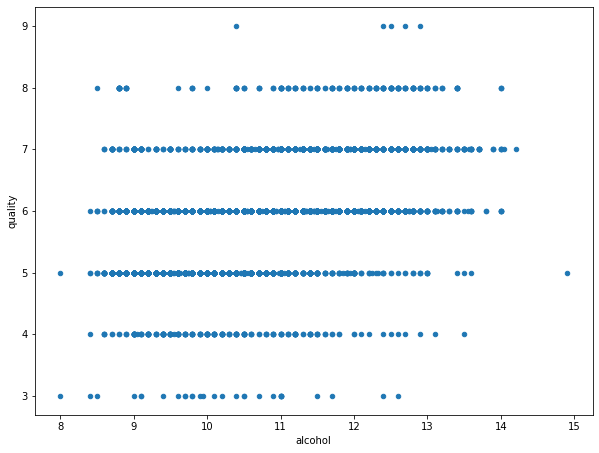

In [7]:
wine_quality_df.plot.scatter(x="alcohol", y="quality",
                             figsize=(10.0, 7.5))

Patrząc na te dane, dość łatwo można zauważyć, że relacja pomiędzy zmiennymi nie jest liniowa. Narysowanie prostej, która przybliży jakość wina na podstawie ilości zawartego w nim alkoholu, wydaje się być trudnym zadaniem. Spróbujemy jednak przeprowadzić ten proces, ale już nie ręcznie, a za pomocą regresji liniowej zaimplementowanej w scikit-learn.

In [8]:
from sklearn.linear_model import LinearRegression

In [11]:
X = wine_quality_df[["alcohol"]]
y = wine_quality_df["quality"]

X.sample(n=5)

,alcohol
1255,11.0
3370,13.2
2105,9.1
1557,11.0
2104,10.6


In [12]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
y_pred = lr.predict(X)
y_pred

array([5.26801454, 5.49573296, 5.69092019, ..., 5.98370102, 5.72345139,
       5.98370102])

In [17]:
lr.coef_, lr.intercept_

(array([0.32531204]), 2.4052686015566556)

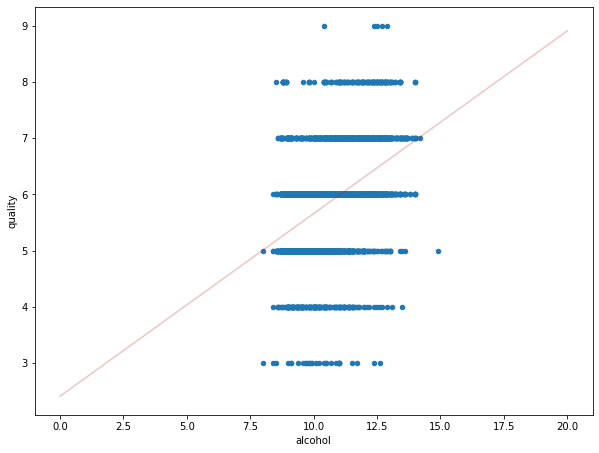

In [19]:
wine_quality_df.plot.scatter(x="alcohol", y="quality",
                             figsize=(10.0, 7.5))
draw_line(lr.coef_, lr.intercept_, x_min=0, x_max=20)